In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats
import plotly.express as px
%matplotlib inline

## Load Data from CSV to Dataframes

In [8]:
Customers = pd.read_csv('Customers.csv',encoding= 'unicode_escape')
Products = pd.read_csv('Products.csv',encoding= 'unicode_escape')
Stores = pd.read_csv('Stores.csv',encoding= 'unicode_escape')
Sales = pd.read_csv('Sales.csv',encoding= 'unicode_escape')
Exchange_Rates = pd.read_csv('Exchange_Rates.csv',encoding= 'unicode_escape')

## Clean Data for Customers

- Rename columns  
- Format date column  
- Check for null values and replace is any    

In [9]:
Customers.head()

CustomerKey  Gender               Name            City State Code  \
0          301  Female      Lilly Harding  WANDEARAH EAST         SA   
1          325  Female       Madison Hull      MOUNT BUDD         WA   
2          554  Female      Claire Ferres       WINJALLOK        VIC   
3          786    Male  Jai Poltpalingada    MIDDLE RIVER         SA   
4         1042    Male    Aidan Pankhurst   TAWONGA SOUTH        VIC   

               State Zip Code    Country  Continent    Birthday  
0    South Australia     5523  Australia  Australia    7/3/1939  
1  Western Australia     6522  Australia  Australia   9/27/1979  
2           Victoria     3380  Australia  Australia   5/26/1947  
3    South Australia     5223  Australia  Australia   9/17/1957  
4           Victoria     3698  Australia  Australia  11/19/1965

In [10]:
Customers = Customers.rename(columns={'Name': 'Customer Name', 'City': 'Customer City','State Code':'Customer State Code','State':'Customer State','Zip Code':'Customer Zip Code','Country':'Customer Country','Continent':'Customer Continent'})

In [11]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerKey          15266 non-null  int64 
 1   Gender               15266 non-null  object
 2   Customer Name        15266 non-null  object
 3   Customer City        15266 non-null  object
 4   Customer State Code  15256 non-null  object
 5   Customer State       15266 non-null  object
 6   Customer Zip Code    15266 non-null  object
 7   Customer Country     15266 non-null  object
 8   Customer Continent   15266 non-null  object
 9   Birthday             15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [12]:
#Convert datatype of 'Birthday' from string to Date
Customers['Birthday'] = pd.to_datetime(Customers['Birthday'],format='%m/%d/%Y')

In [13]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerKey          15266 non-null  int64         
 1   Gender               15266 non-null  object        
 2   Customer Name        15266 non-null  object        
 3   Customer City        15266 non-null  object        
 4   Customer State Code  15256 non-null  object        
 5   Customer State       15266 non-null  object        
 6   Customer Zip Code    15266 non-null  object        
 7   Customer Country     15266 non-null  object        
 8   Customer Continent   15266 non-null  object        
 9   Birthday             15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.2+ MB


In [14]:
Customers.head()

CustomerKey  Gender      Customer Name   Customer City Customer State Code  \
0          301  Female      Lilly Harding  WANDEARAH EAST                  SA   
1          325  Female       Madison Hull      MOUNT BUDD                  WA   
2          554  Female      Claire Ferres       WINJALLOK                 VIC   
3          786    Male  Jai Poltpalingada    MIDDLE RIVER                  SA   
4         1042    Male    Aidan Pankhurst   TAWONGA SOUTH                 VIC   

      Customer State Customer Zip Code Customer Country Customer Continent  \
0    South Australia              5523        Australia          Australia   
1  Western Australia              6522        Australia          Australia   
2           Victoria              3380        Australia          Australia   
3    South Australia              5223        Australia          Australia   
4           Victoria              3698        Australia          Australia   

    Birthday  
0 1939-07-03  
1 1979-09-27  
2 1947-05-26  
3 1957-09-17  
4 1965-11-19

In [15]:
Customers.describe(include='all')

CustomerKey Gender Customer Name Customer City Customer State Code  \
count   1.526600e+04  15266         15266         15266               15256   
unique           NaN      2         15118          8258                 467   
top              NaN   Male    John Smith       Toronto                  CA   
freq             NaN   7748             4           204                 740   
mean    1.060508e+06    NaN           NaN           NaN                 NaN   
min     3.010000e+02    NaN           NaN           NaN                 NaN   
25%     5.140335e+05    NaN           NaN           NaN                 NaN   
50%     1.079244e+06    NaN           NaN           NaN                 NaN   
75%     1.593980e+06    NaN           NaN           NaN                 NaN   
max     2.099937e+06    NaN           NaN           NaN                 NaN   
std     6.127097e+05    NaN           NaN           NaN                 NaN   

       Customer State Customer Zip Code Customer Country Customer Continent  \
count           15266             15266            15266              15266   
unique            512              9505                8                  3   
top        California             90017    United States      North America   
freq              715                70             6828               8381   
mean              NaN               NaN              NaN                NaN   
min               NaN               NaN              NaN                NaN   
25%               NaN               NaN              NaN                NaN   
50%               NaN               NaN              NaN                NaN   
75%               NaN               NaN              NaN                NaN   
max               NaN               NaN              NaN                NaN   
std               NaN               NaN              NaN                NaN   

                             Birthday  
count                           15266  
unique                            NaN  
top                               NaN  
freq                              NaN  
mean    1968-09-20 13:51:07.050962920  
min               1935-02-03 00:00:00  
25%               1952-02-10 06:00:00  
50%               1968-07-25 12:00:00  
75%               1985-06-09 18:00:00  
max               2002-02-18 00:00:00  
std                               NaN

In [16]:
Customers.isnull().any()

CustomerKey            False
Gender                 False
Customer Name          False
Customer City          False
Customer State Code     True
Customer State         False
Customer Zip Code      False
Customer Country       False
Customer Continent     False
Birthday               False
dtype: bool

In [17]:
#Checking which rows are having null
Customers.loc[Customers['Customer State Code'].isnull()]

CustomerKey  Gender       Customer Name      Customer City  \
5304       729681  Female    Rossana Padovesi            Polvica   
5316       732289    Male        Indro Piccio          Varcaturo   
5372       742042    Male     Amaranto Loggia          Casaferro   
5377       742886  Female       Edmonda Capon           Terzigno   
5378       743343  Female        Ambra Sagese  Pomigliano D'Arco   
5485       759705    Male    Callisto Lo Duca            Casilli   
5525       765589    Male  Michelino Lucchesi       Pompei Scavi   
5531       766410    Male   Adelmio Beneventi             Licola   
5631       781667  Female          Ilda Manna             Napoli   
5695       789177    Male   Calogero Folliero      Mariglianella   

     Customer State Code Customer State Customer Zip Code Customer Country  \
5304                 NaN         Napoli             80035            Italy   
5316                 NaN         Napoli             80014            Italy   
5372                 NaN         Napoli             80034            Italy   
5377                 NaN         Napoli             80040            Italy   
5378                 NaN         Napoli             80038            Italy   
5485                 NaN         Napoli             80047            Italy   
5525                 NaN         Napoli             80045            Italy   
5531                 NaN         Napoli             80078            Italy   
5631                 NaN         Napoli             80134            Italy   
5695                 NaN         Napoli             80030            Italy   

     Customer Continent   Birthday  
5304             Europe 1981-04-18  
5316             Europe 1949-02-24  
5372             Europe 1936-03-14  
5377             Europe 1963-08-06  
5378             Europe 1961-01-05  
5485             Europe 1976-08-28  
5525             Europe 1947-11-13  
5531             Europe 1940-01-13  
5631             Europe 1977-05-08  
5695             Europe 2000-03-03

In [18]:
##Replace null with NA(Napoli)
Customers.loc[Customers['Customer State'] == 'Napoli', 'Customer State Code'] = 'NA'

In [19]:
Customers.isnull().any()

CustomerKey            False
Gender                 False
Customer Name          False
Customer City          False
Customer State Code    False
Customer State         False
Customer Zip Code      False
Customer Country       False
Customer Continent     False
Birthday               False
dtype: bool

In [20]:
Customers.head()

CustomerKey  Gender      Customer Name   Customer City Customer State Code  \
0          301  Female      Lilly Harding  WANDEARAH EAST                  SA   
1          325  Female       Madison Hull      MOUNT BUDD                  WA   
2          554  Female      Claire Ferres       WINJALLOK                 VIC   
3          786    Male  Jai Poltpalingada    MIDDLE RIVER                  SA   
4         1042    Male    Aidan Pankhurst   TAWONGA SOUTH                 VIC   

      Customer State Customer Zip Code Customer Country Customer Continent  \
0    South Australia              5523        Australia          Australia   
1  Western Australia              6522        Australia          Australia   
2           Victoria              3380        Australia          Australia   
3    South Australia              5223        Australia          Australia   
4           Victoria              3698        Australia          Australia   

    Birthday  
0 1939-07-03  
1 1979-09-27  
2 1947-05-26  
3 1957-09-17  
4 1965-11-19

## Clean Data for Products

- Convert datatype of cost/price columns from string to float  
- Check for null values and replace if any  

In [21]:
Products.head()

ProductKey                         Product Name    Brand   Color  \
0           1  Contoso 512MB MP3 Player E51 Silver  Contoso  Silver   
1           2    Contoso 512MB MP3 Player E51 Blue  Contoso    Blue   
2           3     Contoso 1G MP3 Player E100 White  Contoso   White   
3           4    Contoso 2G MP3 Player E200 Silver  Contoso  Silver   
4           5       Contoso 2G MP3 Player E200 Red  Contoso     Red   

  Unit Cost USD Unit Price USD  SubcategoryKey Subcategory  CategoryKey  \
0        $6.62         $12.99              101     MP4&MP3            1   
1        $6.62         $12.99              101     MP4&MP3            1   
2        $7.40         $14.52              101     MP4&MP3            1   
3       $11.00         $21.57              101     MP4&MP3            1   
4       $11.00         $21.57              101     MP4&MP3            1   

  Category  
0    Audio  
1    Audio  
2    Audio  
3    Audio  
4    Audio

In [22]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [25]:
#Convert datatype of 'Unit Cost USD' from string to float
Products['Unit Cost USD'] = (
    Products['Unit Cost USD']
    .astype(str)                              # Convert everything to string
    .str.replace('[$,]', '', regex=True)     # Remove $ and commas
    .replace({'nan': None, '': None})         # Optional: Handle empty strings
    .astype(float)                            # Convert to float
)

In [26]:
#Convert datatype of 'Unit Price USD' from string to float
Products['Unit Price USD'] = (
    Products['Unit Price USD']
    .astype(str)                              # Convert everything to string
    .str.replace('[$,]', '', regex=True)     # Remove $ and commas
    .replace({'nan': None, '': None})         # Optional: Handle empty strings
    .astype(float)                            # Convert to float
)

In [27]:
Products.head()

ProductKey                         Product Name    Brand   Color  \
0           1  Contoso 512MB MP3 Player E51 Silver  Contoso  Silver   
1           2    Contoso 512MB MP3 Player E51 Blue  Contoso    Blue   
2           3     Contoso 1G MP3 Player E100 White  Contoso   White   
3           4    Contoso 2G MP3 Player E200 Silver  Contoso  Silver   
4           5       Contoso 2G MP3 Player E200 Red  Contoso     Red   

   Unit Cost USD  Unit Price USD  SubcategoryKey Subcategory  CategoryKey  \
0           6.62           12.99             101     MP4&MP3            1   
1           6.62           12.99             101     MP4&MP3            1   
2           7.40           14.52             101     MP4&MP3            1   
3          11.00           21.57             101     MP4&MP3            1   
4          11.00           21.57             101     MP4&MP3            1   

  Category  
0    Audio  
1    Audio  
2    Audio  
3    Audio  
4    Audio

In [28]:
Products.isnull().any()

ProductKey        False
Product Name      False
Brand             False
Color             False
Unit Cost USD     False
Unit Price USD    False
SubcategoryKey    False
Subcategory       False
CategoryKey       False
Category          False
dtype: bool

## Clean Data for Stores

- Format date column  
- Rename columns  
- Check for null values and replace if any  
- **Assumption**: Square Meters for Online stores can be NULL as Online stores do not need physical space  

In [29]:
Stores.head()

StoreKey    Country                         State  Square Meters  Open Date
0         1  Australia  Australian Capital Territory          595.0   1/1/2008
1         2  Australia            Northern Territory          665.0  1/12/2008
2         3  Australia               South Australia         2000.0   1/7/2012
3         4  Australia                      Tasmania         2000.0   1/1/2010
4         5  Australia                      Victoria         2000.0  12/9/2015

In [30]:
#Convert datatype of 'Open Date' from string to Date
Stores['Open Date'] = pd.to_datetime(Stores['Open Date'],format='%m/%d/%Y')

In [31]:
#Rename columns
Stores = Stores.rename(columns={'Country': 'Store Country', 'State': 'Store State','Open Date':'Store Open Date'})

In [32]:
Stores.head()

StoreKey Store Country                   Store State  Square Meters  \
0         1     Australia  Australian Capital Territory          595.0   
1         2     Australia            Northern Territory          665.0   
2         3     Australia               South Australia         2000.0   
3         4     Australia                      Tasmania         2000.0   
4         5     Australia                      Victoria         2000.0   

  Store Open Date  
0      2008-01-01  
1      2008-01-12  
2      2012-01-07  
3      2010-01-01  
4      2015-12-09

In [33]:
Stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   StoreKey         67 non-null     int64         
 1   Store Country    67 non-null     object        
 2   Store State      67 non-null     object        
 3   Square Meters    66 non-null     float64       
 4   Store Open Date  67 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.7+ KB


In [34]:
Stores.isnull().any()

StoreKey           False
Store Country      False
Store State        False
Square Meters       True
Store Open Date    False
dtype: bool

In [35]:
Stores.loc[Stores['Square Meters'].isnull()] 
#Not replacing square Meters value as Store is Online

StoreKey Store Country Store State  Square Meters Store Open Date
66         0        Online      Online            NaN      2010-01-01

## Clean Data for Exchange Rates

- Format date column  
- Check for null values and replace if any  

In [36]:
Exchange_Rates.head()

Date Currency  Exchange
0  1/1/2015      USD    1.0000
1  1/1/2015      CAD    1.1583
2  1/1/2015      AUD    1.2214
3  1/1/2015      EUR    0.8237
4  1/1/2015      GBP    0.6415

In [37]:
#Convert datatype of 'Date' from string to Date
Exchange_Rates['Date'] = pd.to_datetime(Exchange_Rates['Date'],format='%m/%d/%Y')

In [38]:
Exchange_Rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11215 non-null  datetime64[ns]
 1   Currency  11215 non-null  object        
 2   Exchange  11215 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 263.0+ KB


In [39]:
Exchange_Rates.isnull().any()

Date        False
Currency    False
Exchange    False
dtype: bool

## Clean Data for Sales

- Format date columns  
- Check for null values and replace if any  
- **Assumption**: Delivery Date can be NULL for the order purchased from the physical store  

In [40]:
Sales.head()

Order Number  Line Item Order Date Delivery Date  CustomerKey  StoreKey  \
0        366000          1   1/1/2016           NaN       265598        10   
1        366001          1   1/1/2016     1/13/2016      1269051         0   
2        366001          2   1/1/2016     1/13/2016      1269051         0   
3        366002          1   1/1/2016     1/12/2016       266019         0   
4        366002          2   1/1/2016     1/12/2016       266019         0   

   ProductKey  Quantity Currency Code  
0        1304         1           CAD  
1        1048         2           USD  
2        2007         1           USD  
3        1106         7           CAD  
4         373         1           CAD

In [41]:
#Convert datatype of 'Order Date' from string to Date
Sales['Order Date'] = pd.to_datetime(Sales['Order Date'],format='%m/%d/%Y')

In [42]:
#Convert datatype of 'Delivery Date' from string to Date
Sales['Delivery Date'] = pd.to_datetime(Sales['Delivery Date'],format='%m/%d/%Y')

In [43]:
Sales.head()

Order Number  Line Item Order Date Delivery Date  CustomerKey  StoreKey  \
0        366000          1 2016-01-01           NaT       265598        10   
1        366001          1 2016-01-01    2016-01-13      1269051         0   
2        366001          2 2016-01-01    2016-01-13      1269051         0   
3        366002          1 2016-01-01    2016-01-12       266019         0   
4        366002          2 2016-01-01    2016-01-12       266019         0   

   ProductKey  Quantity Currency Code  
0        1304         1           CAD  
1        1048         2           USD  
2        2007         1           USD  
3        1106         7           CAD  
4         373         1           CAD

In [44]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  13165 non-null  datetime64[ns]
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 4.3+ MB


In [45]:
Sales.isnull().any()

Order Number     False
Line Item        False
Order Date       False
Delivery Date     True
CustomerKey      False
StoreKey         False
ProductKey       False
Quantity         False
Currency Code    False
dtype: bool

In [46]:
Sales.loc[Sales['Delivery Date'].isnull()]
#Not replacing null delivery dates as Physical sales do not have a delivery date. It is populated only for online sales

Order Number  Line Item Order Date Delivery Date  CustomerKey  \
0            366000          1 2016-01-01           NaT       265598   
6            366004          1 2016-01-01           NaT      1107461   
7            366004          2 2016-01-01           NaT      1107461   
8            366005          1 2016-01-01           NaT       844003   
9            366007          1 2016-01-01           NaT      2035771   
...             ...        ...        ...           ...          ...   
62867       2243025          1 2021-02-20           NaT      1909290   
62868       2243025          2 2021-02-20           NaT      1909290   
62869       2243026          1 2021-02-20           NaT      1737466   
62872       2243028          1 2021-02-20           NaT      1728060   
62879       2243030          1 2021-02-20           NaT      1216913   

       StoreKey  ProductKey  Quantity Currency Code  
0            10        1304         1           CAD  
6            38         163         6           GBP  
7            38        1529         2           GBP  
8            33         421         4           EUR  
9            43        1617         1           USD  
...         ...         ...       ...           ...  
62867        49        1128         2           USD  
62868        49        2511         2           USD  
62869        49          58         6           USD  
62872        66        1584         3           USD  
62879        43         632         3           USD  

[49719 rows x 9 columns]

## Combine all Dataframes

In [47]:
#Merge Sales with Product on ProductKey
Sales_Products = pd.merge(Sales,Products,on='ProductKey',how='inner')

In [48]:
#Merge Customers on CustomerKey
Sales_Products_Customers = pd.merge(Sales_Products,Customers,on='CustomerKey',how='inner')

In [49]:
#Merge Stores on StoreKey
Full_Data = pd.merge(Sales_Products_Customers,Stores,on='StoreKey',how='inner')

In [50]:
Full_Data.head()

Order Number  Line Item Order Date Delivery Date  CustomerKey  StoreKey  \
0        366000          1 2016-01-01           NaT       265598        10   
1        366001          1 2016-01-01    2016-01-13      1269051         0   
2        366001          2 2016-01-01    2016-01-13      1269051         0   
3        366002          1 2016-01-01    2016-01-12       266019         0   
4        366002          2 2016-01-01    2016-01-12       266019         0   

   ProductKey  Quantity Currency Code                            Product Name  \
0        1304         1           CAD         Contoso Lens Adapter M450 White   
1        1048         2           USD         A. Datum SLR Camera X136 Silver   
2        2007         1           USD  Fabrikam Microwave 1.5CuFt X1100 Black   
3        1106         7           CAD          Contoso SLR Camera M146 Orange   
4         373         1           CAD   Adventure Works Laptop8.9 E0890 White   

   ... Customer State Code Customer State  Customer Zip Code  \
0  ...                  ON        Ontario            N5W 5K6   
1  ...                  CA     California              93602   
2  ...                  CA     California              93602   
3  ...                  AB        Alberta            T4N 2A6   
4  ...                  AB        Alberta            T4N 2A6   

   Customer Country  Customer Continent   Birthday  Store Country Store State  \
0            Canada       North America 1971-03-23         Canada     Nunavut   
1     United States       North America 1995-11-20         Online      Online   
2     United States       North America 1995-11-20         Online      Online   
3            Canada       North America 1962-08-24         Online      Online   
4            Canada       North America 1962-08-24         Online      Online   

  Square Meters Store Open Date  
0        1210.0      2015-04-04  
1           NaN      2010-01-01  
2           NaN      2010-01-01  
3           NaN      2010-01-01  
4           NaN      2010-01-01  

[5 rows x 31 columns]

## Calculate Sales, Cost, Profit and Profit Margin

In [51]:
#Calculate values
Full_Data['Sales Amount USD'] = Full_Data['Quantity'] * Full_Data['Unit Price USD']
Full_Data['Cost'] = Full_Data['Quantity'] * Full_Data['Unit Cost USD']
Full_Data['Profit'] = Full_Data['Sales Amount USD'] - Full_Data['Cost']
Full_Data['Profit_Margin'] = Full_Data['Profit'] / Full_Data['Sales Amount USD']

# Sales and Revenue Analysis

### 1. Sales over time (Monthly)

In [52]:
#Group data by months
Monthly_Sales = Full_Data.groupby(Full_Data['Order Date'].dt.to_period('M')).agg({'Sales Amount USD':'sum'}).reset_index()
#Make sure date is in datetime format
Monthly_Sales['Order Date']=Monthly_Sales['Order Date'].dt.to_timestamp()

In [53]:
Monthly_Sales

Order Date  Sales Amount USD
0  2016-01-01         649918.78
1  2016-02-01         891098.30
2  2016-03-01         338407.36
3  2016-04-01         110591.63
4  2016-05-01         595986.18
..        ...               ...
57 2020-10-01         245647.59
58 2020-11-01         256701.02
59 2020-12-01         651526.44
60 2021-01-01         513021.58
61 2021-02-01         526266.90

[62 rows x 2 columns]

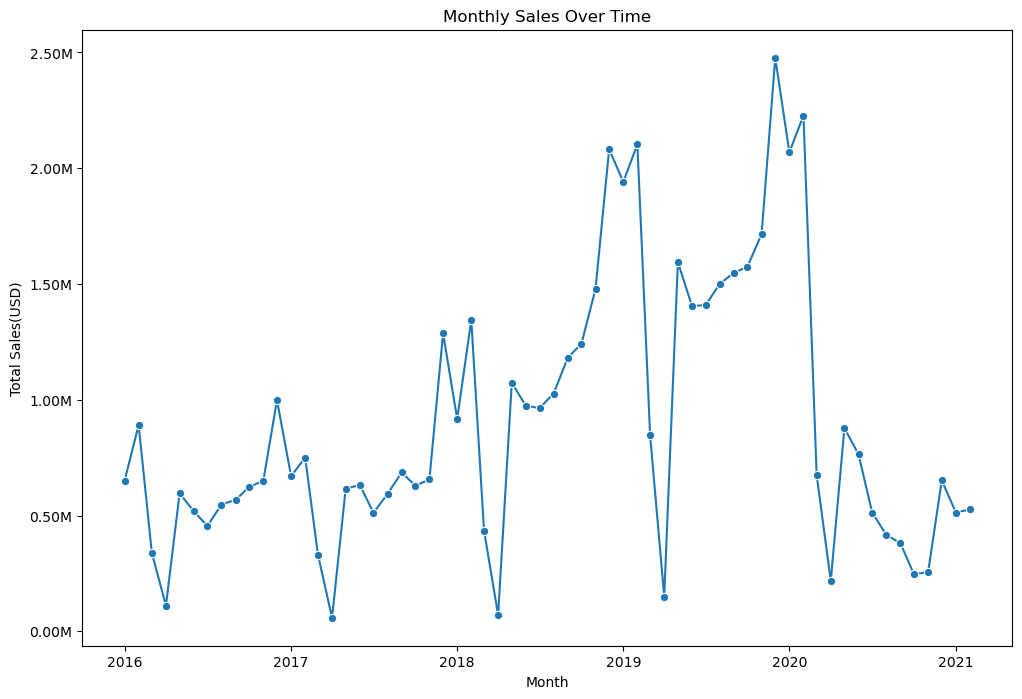

In [54]:
#set graph size
plt.figure(figsize=(12,8))
#specify graph type, which data we want to use, x and y axis, and also marker(Optional) if we want to see markers
sns.lineplot(data= Monthly_Sales, x='Order Date', y='Sales Amount USD',marker='o')

#Format y axis to show sales amount in million without doing calculation in dataframe
formatter = ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.2f}M')
#x * 1e-6 converts the raw value to millions
#.1f keeps one decimal place (you can adjust it)
#You can change 'M' to 'Mn', 'M USD', etc.
plt.gca().yaxis.set_major_formatter(formatter)

#Define title and labels
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales(USD)')
plt.show()

### 2. Sales over time (Quartly)

In [55]:
#Group data by Quarter
Quartly_Sales = Full_Data.groupby(Full_Data['Order Date'].dt.to_period('Q')).agg({'Sales Amount USD':'sum'}).reset_index()
Quartly_Sales['Order Date']=Quartly_Sales['Order Date'].dt.to_timestamp()

In [56]:
Quartly_Sales.head()

Order Date  Sales Amount USD
0 2016-01-01        1879424.44
1 2016-04-01        1225163.09
2 2016-07-01        1569893.64
3 2016-10-01        2272312.39
4 2017-01-01        1751889.58

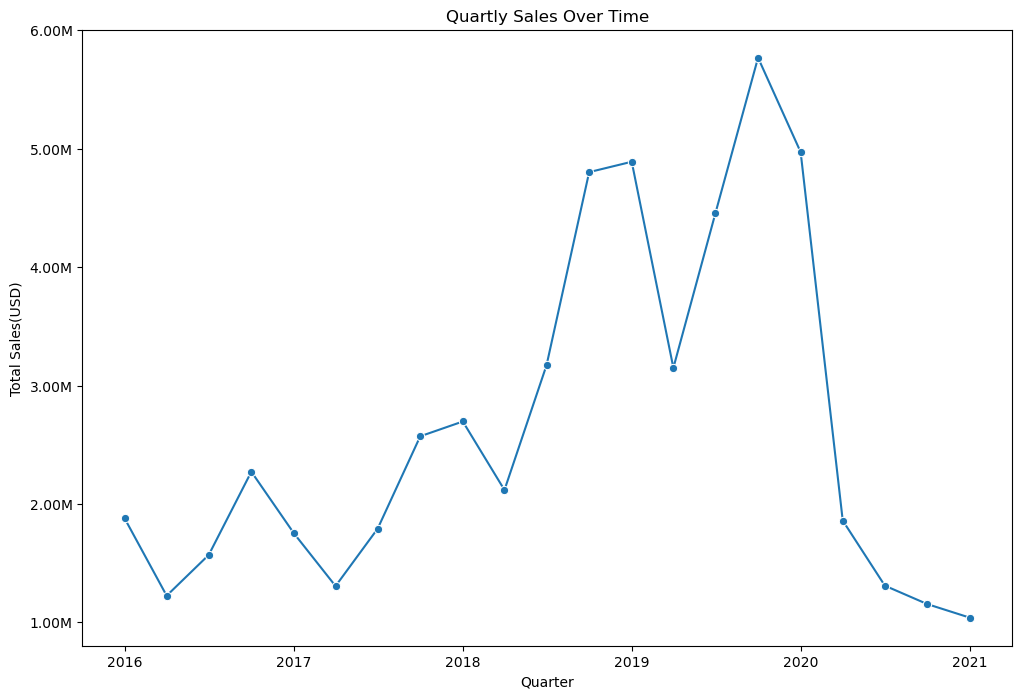

In [57]:
plt.figure(figsize=(12,8))
sns.lineplot(data= Quartly_Sales, x='Order Date', y='Sales Amount USD',marker='o')

formatter = ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.2f}M')
#x * 1e-6 converts the raw value to millions
#.1f keeps one decimal place (you can adjust it)
#You can change 'M' to 'Mn', 'M USD', etc.
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Quartly Sales Over Time')
plt.xlabel('Quarter')
plt.ylabel('Total Sales(USD)')
plt.show()

### 3. Monthly Sales vs Profit

In [58]:
monthly_metrics = Full_Data.groupby(Full_Data['Order Date'].dt.to_period('M')).agg({
    'Sales Amount USD': 'sum',
    'Profit': 'sum'
}).reset_index()
monthly_metrics['Profit_Margin'] = monthly_metrics['Profit'] / monthly_metrics['Sales Amount USD']
monthly_metrics['Order Date'] = monthly_metrics['Order Date'].dt.to_timestamp()

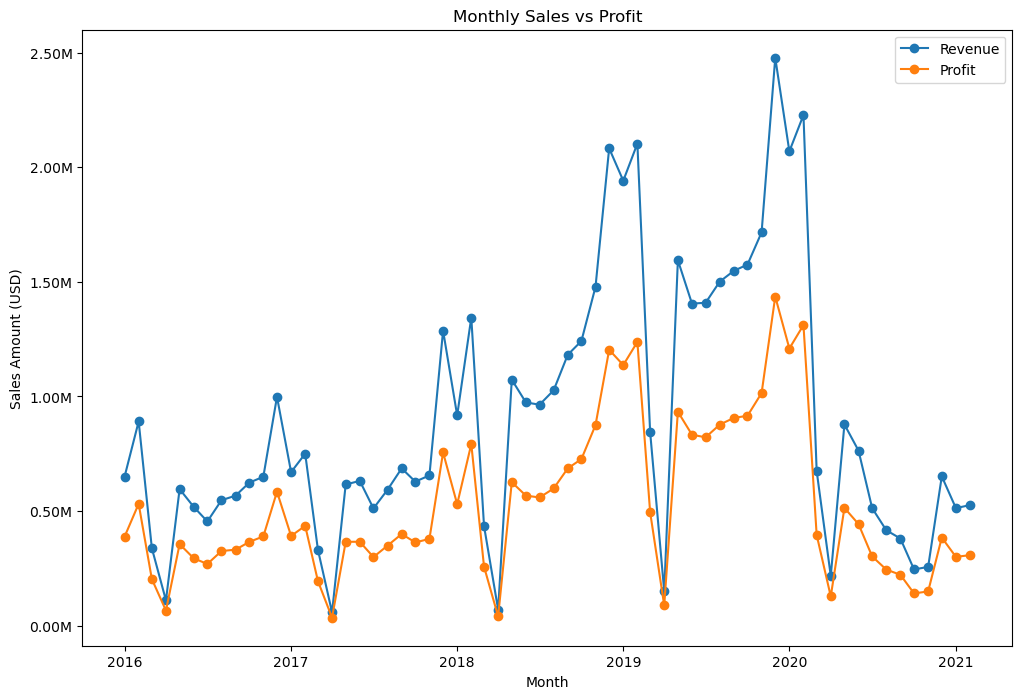

'plt.figure(figsize=(10, 5))\nplt.plot(monthly_metrics[\'Order Date\'], monthly_metrics[\'Profit_Margin\'], label=\'Profit Margin\', color=\'red\')\nplt.title("Profit Margin Over Time")\nplt.legend()\nplt.show()'

In [59]:
plt.figure(figsize=(12,8))
plt.plot(monthly_metrics['Order Date'], monthly_metrics['Sales Amount USD'], label='Revenue',marker='o')
plt.plot(monthly_metrics['Order Date'], monthly_metrics['Profit'], label='Profit',marker='o')
formatter = ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.2f}M')
#x * 1e-6 converts the raw value to millions
#.1f keeps one decimal place (you can adjust it)
#You can change 'M' to 'Mn', 'M USD', etc.
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Monthly Sales vs Profit')
plt.xlabel('Month')
plt.ylabel('Sales Amount (USD)')
plt.legend()
plt.show()

'''plt.figure(figsize=(10, 5))
plt.plot(monthly_metrics['Order Date'], monthly_metrics['Profit_Margin'], label='Profit Margin', color='red')
plt.title("Profit Margin Over Time")
plt.legend()
plt.show()'''

### 4. Sales by Store Country

In [60]:
Country_Sales = Full_Data.groupby('Store Country')['Sales Amount USD'].sum().reset_index()
Country_Sales = Country_Sales.sort_values(by='Sales Amount USD', ascending=False)

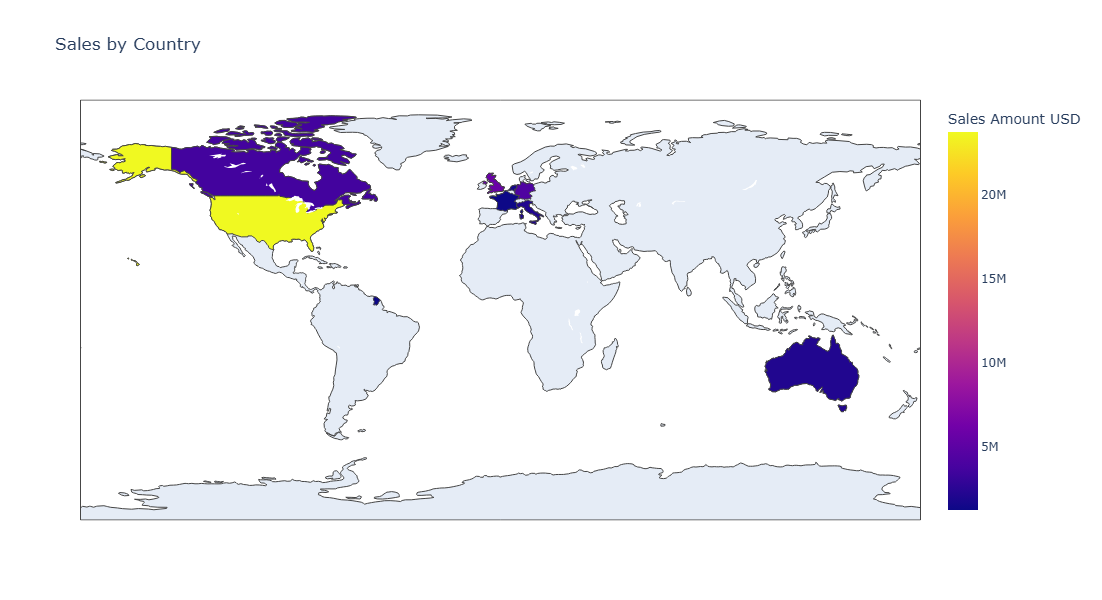

In [61]:
fig = px.choropleth(
    Country_Sales,
    locations='Store Country',
    locationmode='country names',
    color='Sales Amount USD',
    hover_name= 'Store Country',
    title= 'Sales by Country',
    width = 1000,
    height = 600
)

fig.show()

### 5. Sales by Store Country and State

In [62]:
# Group by Country and State
Grouped_Country_State = Full_Data.groupby(['Store Country', 'Store State'])['Sales Amount USD'].sum().reset_index()

# Calculate total sales per Country for sorting
Country_Totals = Grouped_Country_State.groupby('Store Country')['Sales Amount USD'].sum().sort_values()

# Create a 'combined label' column for Y-axis
Grouped_Country_State['Label'] = Grouped_Country_State['Store Country'] + ' - ' + Grouped_Country_State['Store State']

# Sort by Country total (custom order)
Country_Order = Country_Totals.index.tolist()
Grouped_Country_State['Store Country'] = pd.Categorical(Grouped_Country_State['Store Country'], categories=Country_Order, ordered=True)
Grouped_Country_State = Grouped_Country_State.sort_values(['Store Country', 'Sales Amount USD'], ascending=[True, True])

# Get a color palette (one color per category)
palette = sns.color_palette("Spectral",n_colors=len(Country_Order))
country_colors = dict(zip(Country_Order, palette))
Grouped_Country_State['Color'] = Grouped_Country_State['Store Country'].astype(str).map(country_colors)

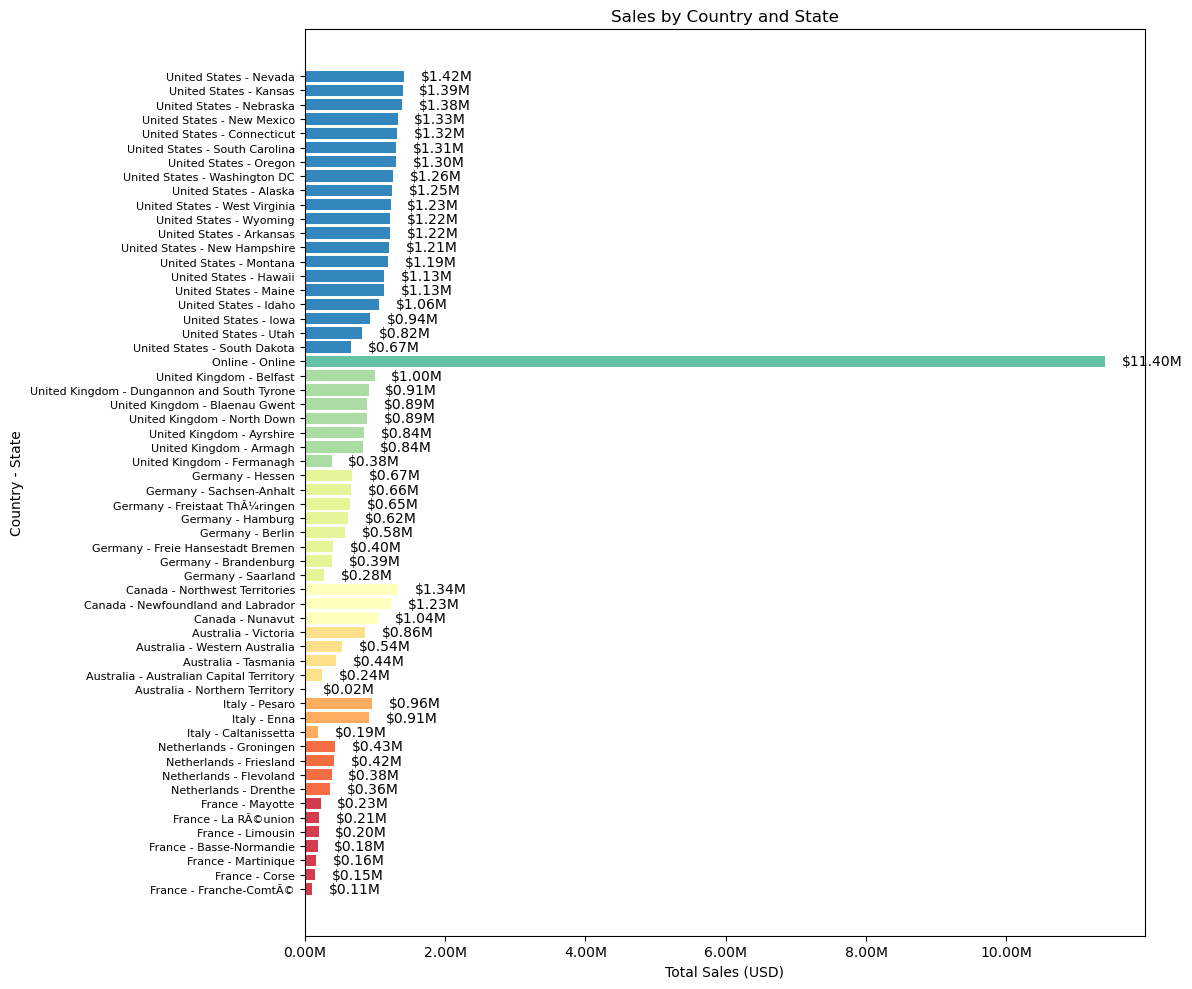

In [63]:
plt.figure(figsize=(12, 10))
bars=plt.barh(Grouped_Country_State['Label'], Grouped_Country_State['Sales Amount USD'], color=Grouped_Country_State['Color'])
plt.title('Sales by Country and State')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Country - State')
plt.yticks(fontsize=8)
formatter = ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.2f}M')
#x * 1e-6 converts the raw value to millions
#.1f keeps one decimal place (you can adjust it)
#You can change 'M' to 'Mn', 'M USD', etc.
plt.gca().xaxis.set_major_formatter(formatter)
for bar in bars:
    width = bar.get_width()
    label = f"${width * 1e-6:.2f}M"
    plt.text(width + Country_Totals.max() * 0.01, bar.get_y() + bar.get_height() / 2, label, va='center')
    
plt.tight_layout()
plt.show()

# Store Performance

### 1. Top and Bottom 10 stores by Revenue

In [64]:
Store_Sales = Full_Data.groupby('StoreKey')['Sales Amount USD'].sum().sort_values(ascending=False).reset_index()
Store_Sales_Top10 = Store_Sales.head(10)
Store_Sales_Bottom10 = Store_Sales.tail(10)

In [65]:
Store_Sales_Top10

StoreKey  Sales Amount USD
0         0       11404324.63
1        55        1417885.41
2        50        1394738.06
3        54        1384396.24
4         9        1336150.06
5        57        1325611.89
6        45        1318787.92
7        61        1305684.43
8        59        1302272.44
9        64        1259350.98

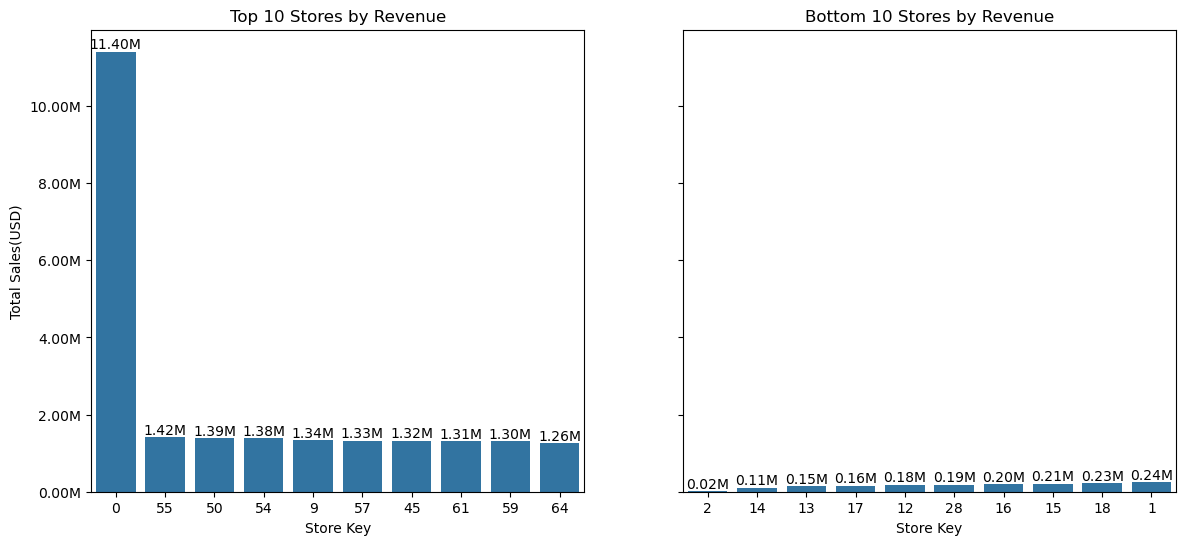

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.barplot(data=Store_Sales_Top10 , x='StoreKey', y='Sales Amount USD',
            order=Store_Sales_Top10.sort_values('Sales Amount USD',ascending = False).StoreKey, ax=ax1)

formatter = ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.2f}M')
#x * 1e-6 converts the raw value to millions
#.1f keeps one decimal place (you can adjust it)
#You can change 'M' to 'Mn', 'M USD', etc.
plt.gca().yaxis.set_major_formatter(formatter)

for bar in ax1.patches:
    height = bar.get_height()
    label = f'{height * 1e-6:.2f}M'  # convert to millions
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        label,
        ha='center', va='bottom'
    )
    
ax1.set_title('Top 10 Stores by Revenue')
ax1.set_xlabel('Store Key')
ax1.set_ylabel('Total Sales(USD)')

sns.barplot(data=Store_Sales_Bottom10 , x='StoreKey', y='Sales Amount USD',
            order=Store_Sales_Bottom10.sort_values('Sales Amount USD',ascending = True).StoreKey, ax=ax2 )

formatter = ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.2f}M')
#x * 1e-6 converts the raw value to millions
#.1f keeps one decimal place (you can adjust it)
#You can change 'M' to 'Mn', 'M USD', etc.
plt.gca().yaxis.set_major_formatter(formatter)

for bar in ax2.patches:
    height = bar.get_height()
    label = f'{height * 1e-6:.2f}M'  # convert to millions
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        label,
        ha='center', va='bottom'
    )
    
ax2.set_title('Bottom 10 Stores by Revenue')
ax2.set_xlabel('Store Key')
ax2.set_ylabel('Total Sales(USD)')

plt.show()

### 2. Top and Bottom 10 stores by AOV

In [67]:
Store_AOV = Full_Data.groupby('StoreKey').agg({'Sales Amount USD': 'sum','Order Number': pd.Series.nunique}).reset_index()
Store_AOV['AOV'] = Store_AOV['Sales Amount USD'] / Store_AOV['Order Number']

# Sort and plot
Store_AOV_Top10 = Store_AOV.sort_values(by='AOV', ascending=False).head(10)
Store_AOV_Bottom10 = Store_AOV.sort_values(by='AOV', ascending=False).tail(10)

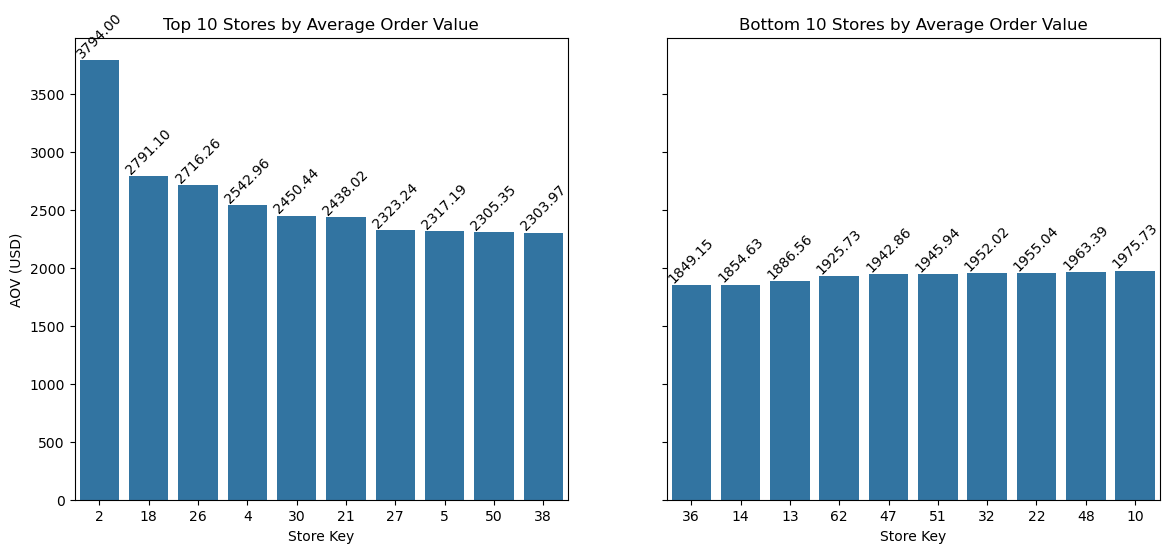

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.barplot(data=Store_AOV_Top10,x='StoreKey', y='AOV',order=Store_AOV_Top10.sort_values('AOV',ascending = False).StoreKey,ax = ax1)

for bar in ax1.patches:
    height = bar.get_height()
    label = f'{height:.2f}'
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        label,
        ha='center', va='bottom',rotation=45
    )
    
ax1.set_title('Top 10 Stores by Average Order Value')
ax1.set_xlabel('Store Key')
ax1.set_ylabel('AOV (USD)')

#plt.figure(figsize=(12,8))
sns.barplot(data=Store_AOV_Bottom10,x='StoreKey',y='AOV',order=Store_AOV_Bottom10.sort_values('AOV',ascending = True).StoreKey,ax=ax2 )

for bar in ax2.patches:
    height = bar.get_height()
    label = f'{height:.2f}'
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        label,
        ha='center', va='bottom', rotation=45
    )
    
ax2.set_title('Bottom 10 Stores by Average Order Value')
ax2.set_xlabel('Store Key')
ax2.set_ylabel('AOV (USD)')
plt.show()

### 3. Sales over time (Monthly) - Online vs Physical Stores

In [69]:
Full_Data['Store Type'] = np.where(Full_Data['Square Meters'].isnull(),'Online','Physical')
Store_Type_Sales = Full_Data.groupby([Full_Data['Order Date'].dt.to_period('M'),'Store Type'])['Sales Amount USD'].sum().reset_index()
Store_Type_Sales['Order Date']=Store_Type_Sales['Order Date'].dt.to_timestamp()
# Pivot for plotting
pivot_df = Store_Type_Sales.pivot(index='Order Date', columns='Store Type', values='Sales Amount USD').fillna(0)

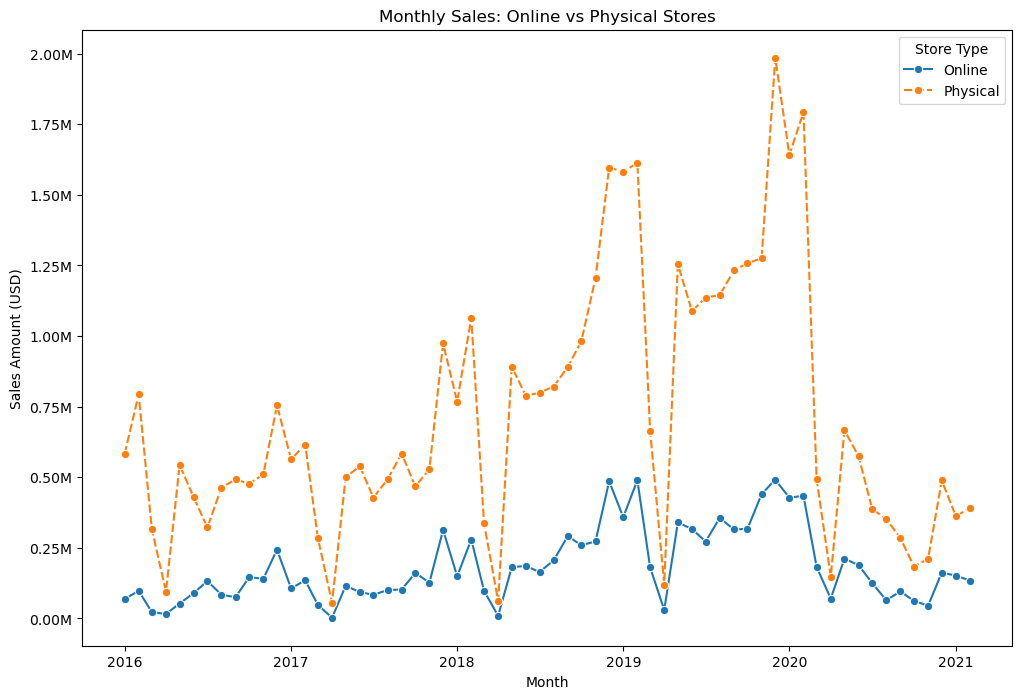

In [70]:
plt.figure(figsize = (12,8))
sns.lineplot(data = pivot_df,marker='o')
formatter = ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.2f}M')
#x * 1e-6 converts the raw value to millions
#.1f keeps one decimal place (you can adjust it)
#You can change 'M' to 'Mn', 'M USD', etc.
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Monthly Sales: Online vs Physical Stores')
plt.ylabel('Sales Amount (USD)')
plt.xlabel('Month')
#plt.xticks(rotation=90)
plt.legend(title='Store Type')
plt.show()

### 4. Store Age Impact

In [71]:
# Today's date
today = pd.to_datetime('today')

# Store Age in years
Full_Data['Store Age (Years)'] = (today - Full_Data['Store Open Date']).dt.days / 365

# Bin store ages
Full_Data['Store Age Group'] = pd.cut(Full_Data['Store Age (Years)'], bins=[0, 2, 5, 7, 10, 20], labels=['0-2', '2-5', '5-7', '7-10', '10+'])

# Group and aggregate
Age_Impact = Full_Data.groupby('Store Age Group')['Sales Amount USD'].mean().reset_index()

C:\Users\ravip\AppData\Local\Temp\ipykernel_36068\858672571.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



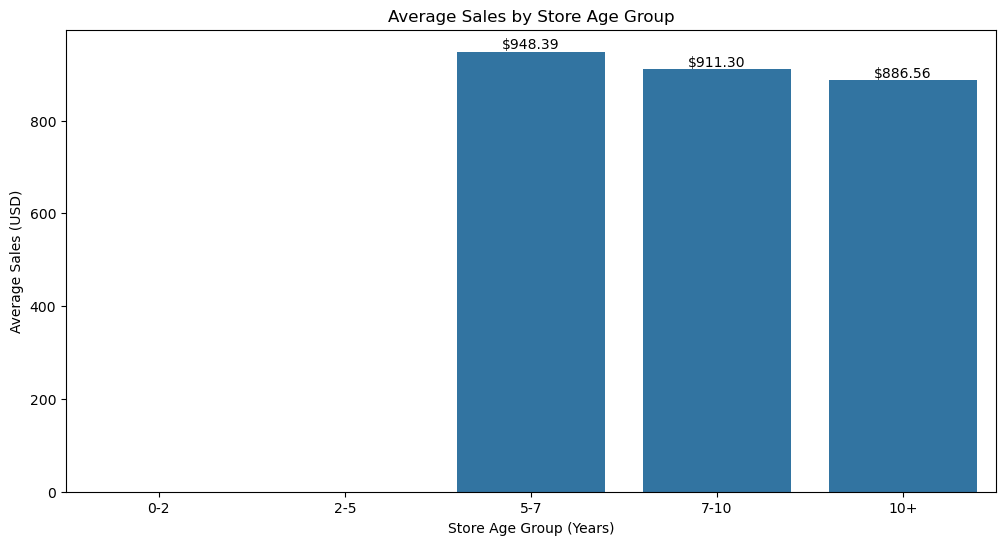

In [72]:
plt.figure(figsize=(12,6))
bars=sns.barplot(data=Age_Impact, x='Store Age Group', y='Sales Amount USD')
for bar in bars.patches:
    height = bar.get_height()
    label = f'${height:.2f}'
    if label != '$0.00':
        plt.text(bar.get_x() + bar.get_width() / 2,height,label,ha='center', va='bottom')
plt.title('Average Sales by Store Age Group')
plt.ylabel('Average Sales (USD)')
plt.xlabel('Store Age Group (Years)')
plt.show()

# Product Performance

### 1. Top and Bottom 10 Products by Revenue and Profit

In [73]:
#Group by product
Product_Sales = Full_Data.groupby('Product Name').agg({'Sales Amount USD':'sum','Profit':'sum'}).reset_index()

#Top and Bottom 10 Products by Revenue
Top10_Selling_Products = Product_Sales.sort_values('Sales Amount USD',ascending=False).head(10)
Bottom10_Selling_Products = Product_Sales.sort_values('Sales Amount USD',ascending=False).tail(10)

# Sort the data for horizontal bar chart
Top10_Selling_Products = Top10_Selling_Products.sort_values('Sales Amount USD', ascending=True)
Bottom10_Selling_Products = Bottom10_Selling_Products.sort_values('Sales Amount USD', ascending=False)

#Top and Bottom 10 Products by Profit
Top10_Profitable_Products = Product_Sales.sort_values('Profit',ascending=False).head(10)
Bottom10_Profitable_Products = Product_Sales.sort_values('Profit',ascending=False).tail(10)

# Sort the data for horizontal bar chart
Top10_Profitable_Products = Top10_Profitable_Products.sort_values('Profit', ascending=True)
Bottom10_Profitable_Products = Bottom10_Profitable_Products.sort_values('Profit', ascending=False)

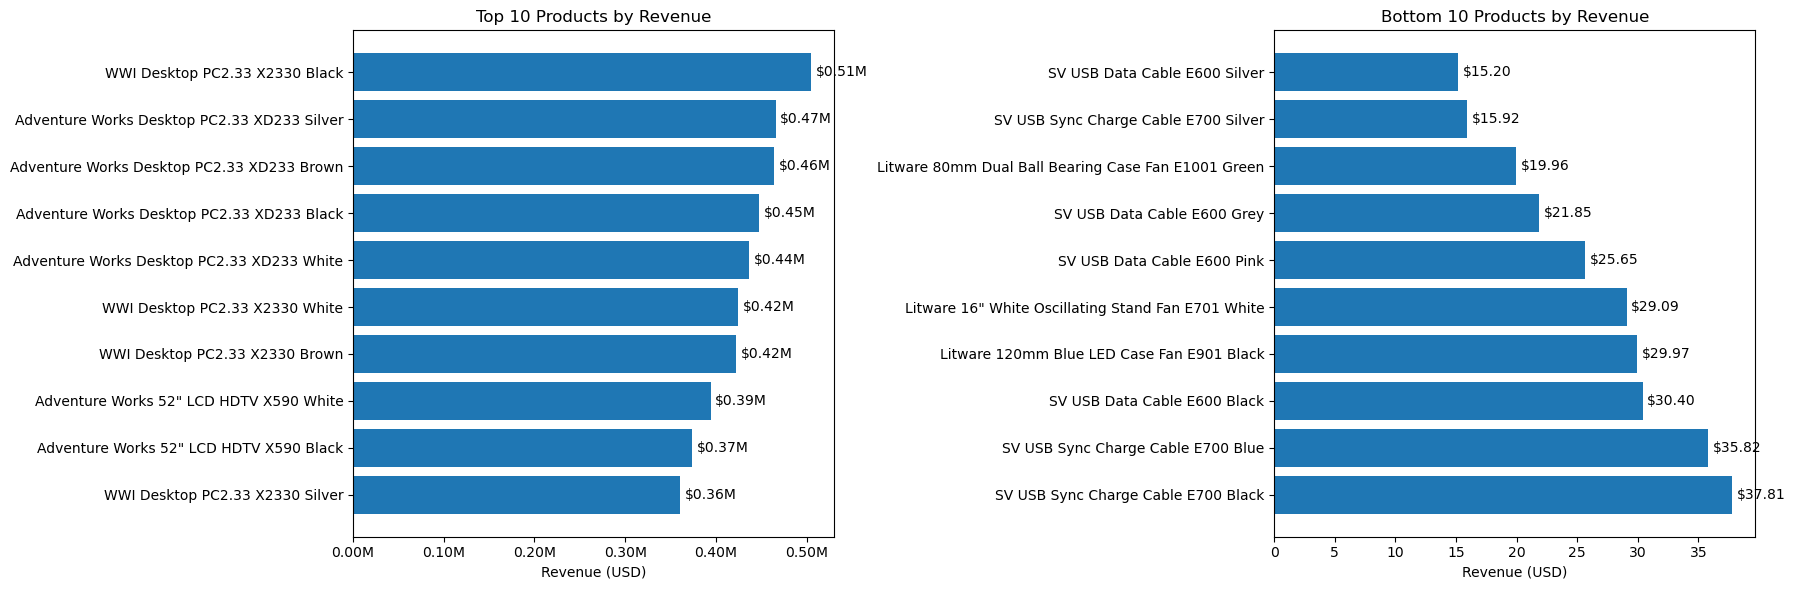

In [74]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6),sharey=False)
bars1 = ax1.barh(Top10_Selling_Products['Product Name'], Top10_Selling_Products['Sales Amount USD'])
ax1.set_title('Top 10 Products by Revenue')
ax1.set_xlabel('Revenue (USD)')
#ax1.set_ylabel('Product')
formatter = ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.2f}M')
#x * 1e-6 converts the raw value to millions
#.1f keeps one decimal place (you can adjust it)
#You can change 'M' to 'Mn', 'M USD', etc.
ax1.xaxis.set_major_formatter(formatter)
for bar in bars1:
    width = bar.get_width()
    label = f"${width * 1e-6:.2f}M"
    ax1.text(width + Top10_Selling_Products['Sales Amount USD'].max() * 0.01, bar.get_y() + bar.get_height() / 2, label, va='center')

bars2 = ax2.barh(Bottom10_Selling_Products['Product Name'], Bottom10_Selling_Products['Sales Amount USD'])
ax2.set_title('Bottom 10 Products by Revenue')
ax2.set_xlabel('Revenue (USD)')
#ax2.set_ylabel('Product')
for bar in bars2:
    width = bar.get_width()
    label = f"${width:.2f}"
    ax2.text(width + Bottom10_Selling_Products['Sales Amount USD'].max() * 0.01, bar.get_y() + bar.get_height() / 2, label, va='center')
    
plt.tight_layout()
plt.show()

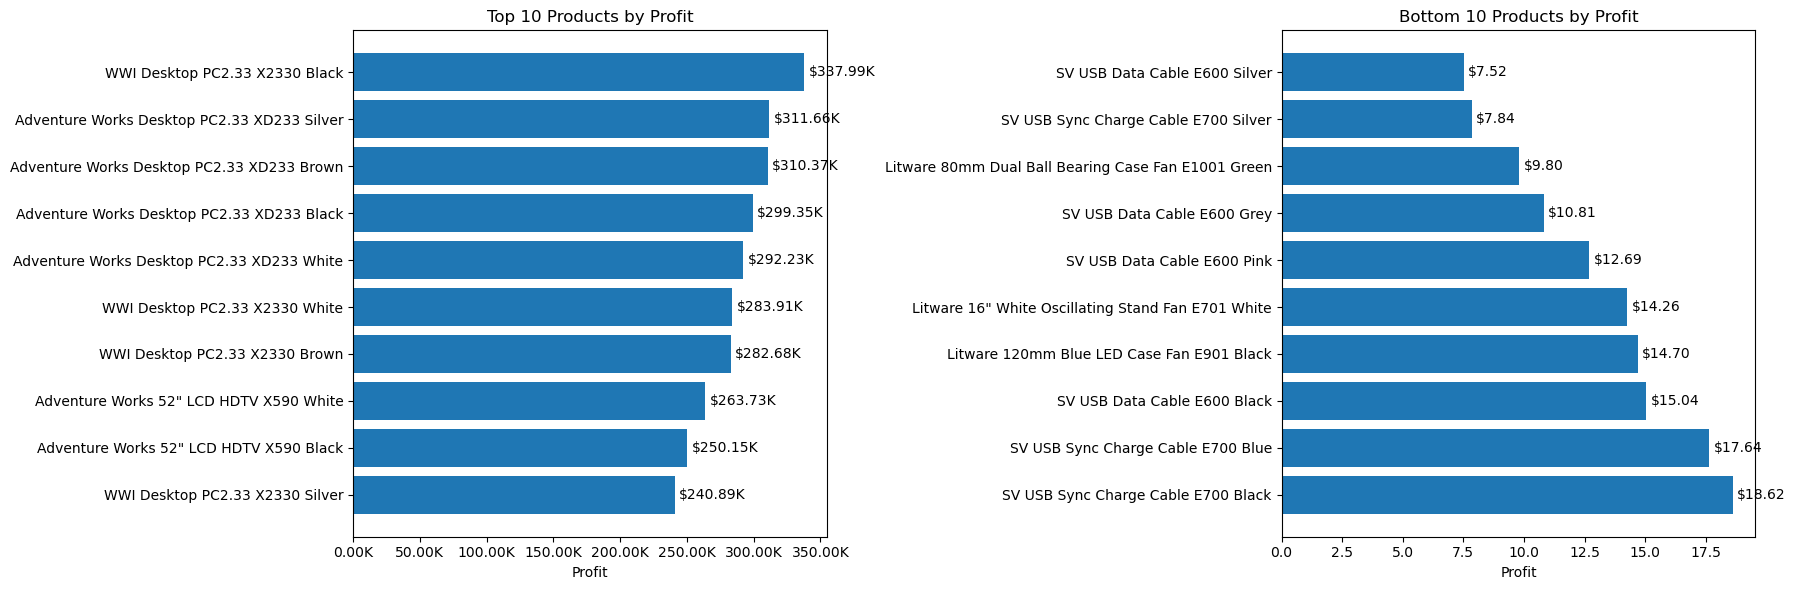

In [75]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6),sharey=False)
bars1 = ax1.barh(Top10_Profitable_Products['Product Name'], Top10_Profitable_Products['Profit'])
ax1.set_title('Top 10 Products by Profit')
ax1.set_xlabel('Profit')
#ax1.set_ylabel('Product')
formatter = ticker.FuncFormatter(lambda x, pos: f'{x*1e-3:.2f}K')
#x * 1e-3 converts the raw value to millions
#.1f keeps one decimal place (you can adjust it)
#You can change 'M' to 'Mn', 'M USD', etc.
ax1.xaxis.set_major_formatter(formatter)
for bar in bars1:
    width = bar.get_width()
    label = f"${width * 1e-3:.2f}K"
    ax1.text(width + Top10_Profitable_Products['Profit'].max() * 0.01, bar.get_y() + bar.get_height() / 2, label, va='center')

bars2 = ax2.barh(Bottom10_Profitable_Products['Product Name'], Bottom10_Profitable_Products['Profit'])
ax2.set_title('Bottom 10 Products by Profit')
ax2.set_xlabel('Profit')
#ax2.set_ylabel('Product')
for bar in bars2:
    width = bar.get_width()
    label = f"${width:.2f}"
    ax2.text(width + Bottom10_Profitable_Products['Profit'].max() * 0.01, bar.get_y() + bar.get_height() / 2, label, va='center')
    
plt.tight_layout()
plt.show()

### 2. Sales by Product Category

In [76]:
#Group data by product category
Product_Category_Sales = Full_Data.groupby('Category')['Sales Amount USD'].sum() 
#Above line returns series instaed of code Dataframe. Series is in 1D which is ideal for Pie Chart

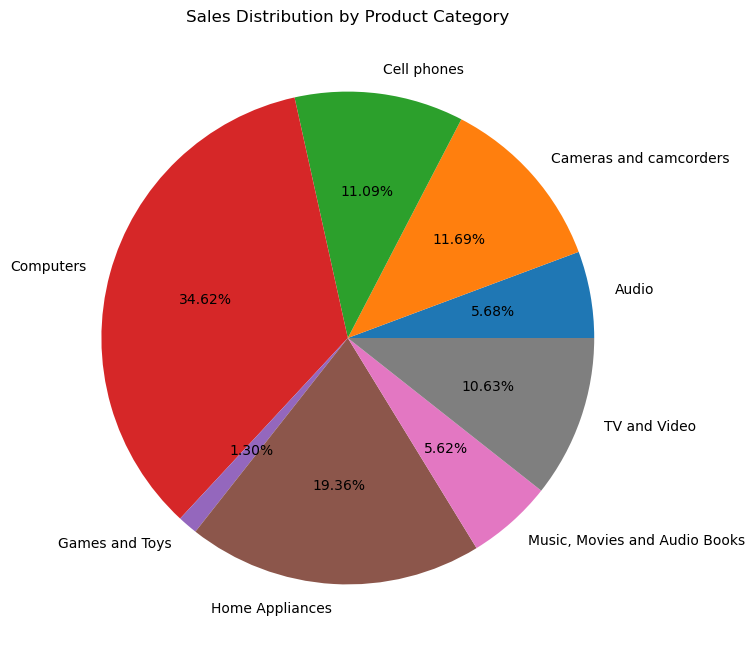

In [77]:
plt.figure(figsize=(8, 8))
plt.pie(Product_Category_Sales, labels=Product_Category_Sales.index, autopct='%1.2f%%')
plt.title('Sales Distribution by Product Category')
plt.show()

### 3. Sales by Product Category and Sub-category

In [78]:
# Group by Category and Sub-Category
grouped = Full_Data.groupby(['Category', 'Subcategory'])['Sales Amount USD'].sum().reset_index()

# Calculate total sales per category for sorting
category_totals = grouped.groupby('Category')['Sales Amount USD'].sum().sort_values()

# Create a 'combined label' column for Y-axis
grouped['Label'] = grouped['Category'] + ' - ' + grouped['Subcategory']

# Sort by Category total (custom order)
category_order = category_totals.index.tolist()
grouped['Category'] = pd.Categorical(grouped['Category'], categories=category_order, ordered=True)
grouped = grouped.sort_values(['Category', 'Sales Amount USD'], ascending=[True, True])

# Get a color palette (one color per category)
palette = sns.color_palette("Spectral",n_colors=len(category_order))
category_colors = dict(zip(category_order, palette))
grouped['Color'] = grouped['Category'].astype(str).map(category_colors)

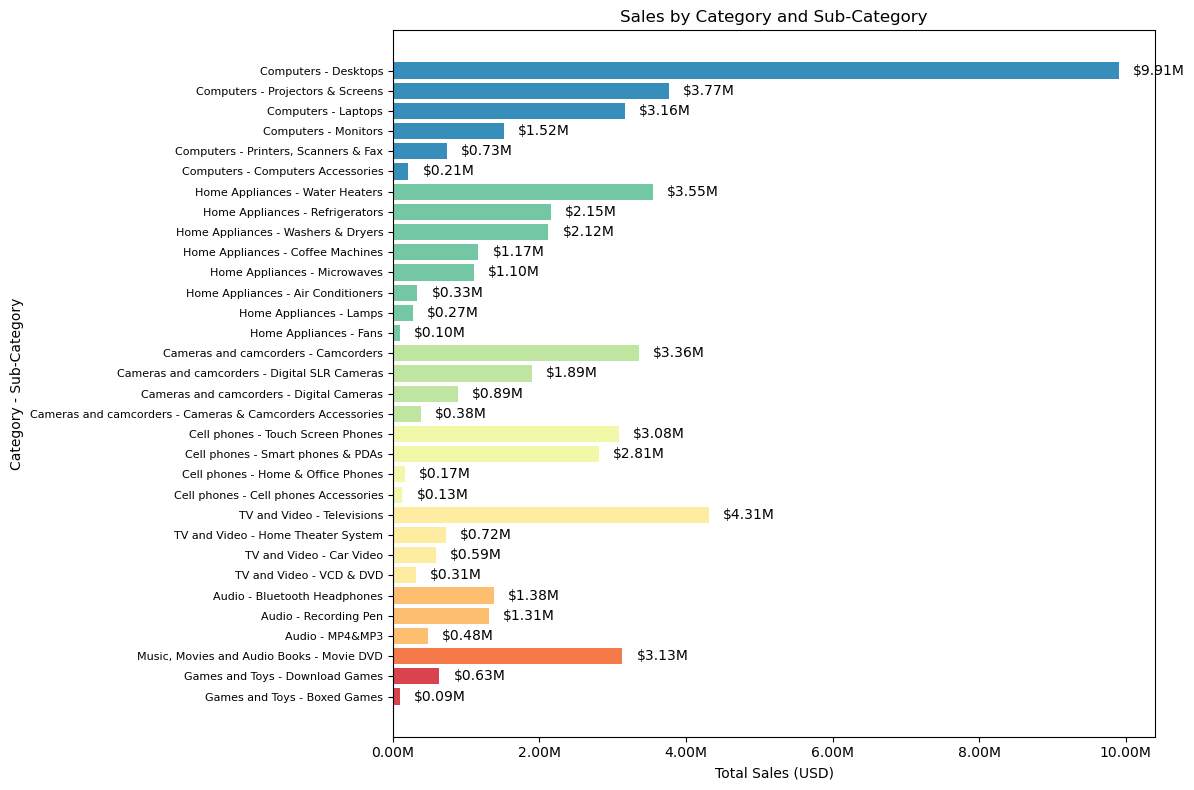

In [79]:
plt.figure(figsize=(12, 8))
bars=plt.barh(grouped['Label'], grouped['Sales Amount USD'], color=grouped['Color'])
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Category - Sub-Category')
plt.yticks(fontsize=8)
formatter = ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.2f}M')
#x * 1e-6 converts the raw value to millions
#.1f keeps one decimal place (you can adjust it)
#You can change 'M' to 'Mn', 'M USD', etc.
plt.gca().xaxis.set_major_formatter(formatter)
for bar in bars:
    width = bar.get_width()
    label = f"${width * 1e-6:.2f}M"
    plt.text(width + category_totals.max() * 0.01, bar.get_y() + bar.get_height() / 2, label, va='center')
    
plt.tight_layout()
plt.show()

### 4. Brand Preference

In [80]:
#Group by Store country and brand
Brand_Preference = Full_Data.groupby(['Store Country','Brand'])['Sales Amount USD'].sum().reset_index()

#Get the top 3 per Store Country
Top3_Brands = Brand_Preference.sort_values(['Store Country', 'Sales Amount USD'], ascending=[True, False])
Top3_Brands = Top3_Brands.groupby('Store Country').head(3)

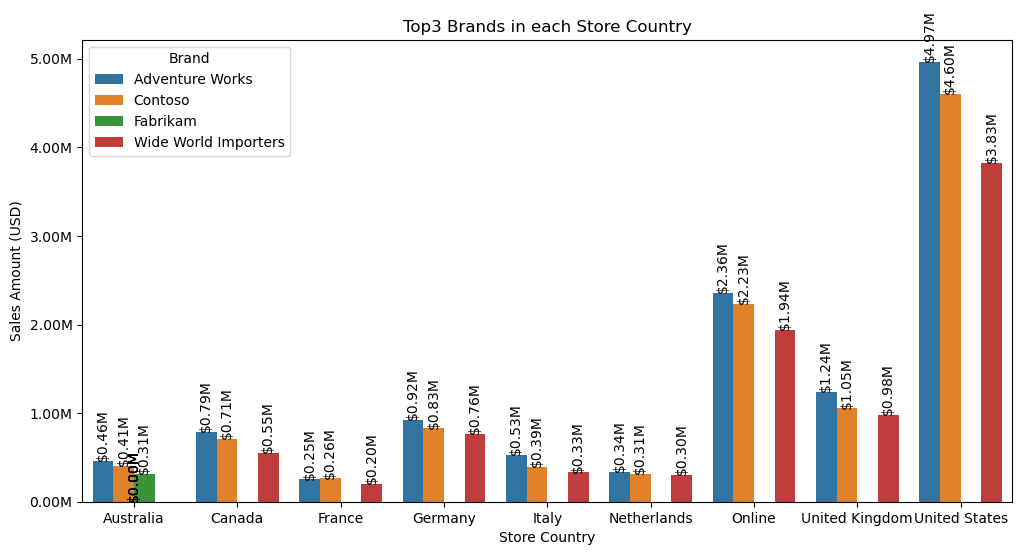

In [81]:
plt.figure(figsize=(12,6))
bars=sns.barplot(data=Top3_Brands,x='Store Country',y='Sales Amount USD',hue='Brand')
formatter=ticker.FuncFormatter(lambda x,pos: f'{x*1e-6:.2f}M')
plt.gca().yaxis.set_major_formatter(formatter)
for bar in bars.patches:
    height = bar.get_height()
    label = f'${height*1e-6:.2f}M'
    if label != '$0.00':
        plt.text(bar.get_x() + bar.get_width() / 2,height,label,ha='center', va='bottom',rotation=90)
plt.title('Top3 Brands in each Store Country')
plt.xlabel('Store Country')
plt.ylabel('Sales Amount (USD)')
plt.show()

# Order Insight

count    13165.000000
mean         4.529130
std          2.121071
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         17.000000
Name: Delivery_Time_Days, dtype: float64


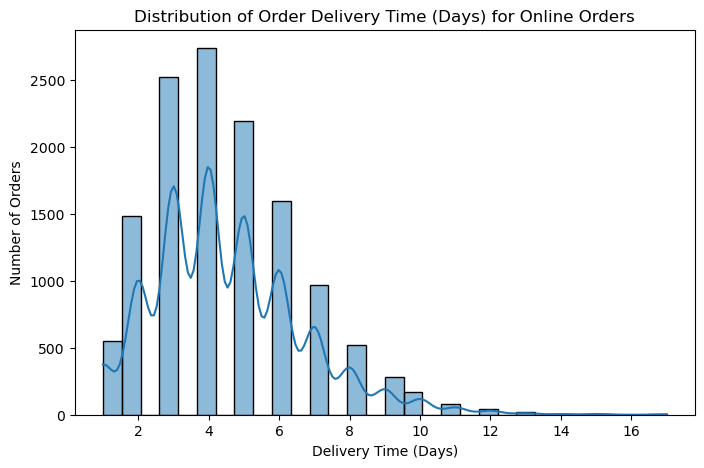

In [82]:
# 1. Filter out rows with missing Delivery Date
Delivered_Orders = Full_Data[Full_Data['Delivery Date'].notnull()].copy()

# 2. Calculate delivery time (in days)
Delivered_Orders['Delivery_Time_Days'] = (Delivered_Orders['Delivery Date'] - Delivered_Orders['Order Date']).dt.days

# 3. Summary stats
print(Delivered_Orders['Delivery_Time_Days'].describe())

plt.figure(figsize=(8,5))
sns.histplot(Delivered_Orders['Delivery_Time_Days'], bins=30, kde=True)
plt.title('Distribution of Order Delivery Time (Days) for Online Orders')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Number of Orders')
plt.show()

# Customer Analysis

### 1. Customer Repeat Purchase Rate

In [84]:
# Step 1: Count number of purchases and total sales per customer
Repeat_Customers = Full_Data.groupby('CustomerKey').agg({
    'Order Date': 'nunique',        # Purchase count (based on unique order dates)
    'Sales Amount USD': 'sum'                  # Total sales
}).reset_index()
Repeat_Customers.rename(columns={'Order Date':'Purchase_Count','Sales Amount USD':'Total_Sales'},inplace=True)

# Step 2: Calculate repeat purchase rate
repeat_purchase_rate = Repeat_Customers[Repeat_Customers['Purchase_Count'] > 1]['CustomerKey'].nunique() / Repeat_Customers['CustomerKey'].nunique()

print(f"Repeat Purchase Rate: {repeat_purchase_rate:.2%}")

Repeat Purchase Rate: 61.16%


### 2. Repeact Customer Details

In [85]:
Repeat = Repeat_Customers[Repeat_Customers['Purchase_Count'] > 1]

In [86]:
Repeat_Customer_Detail = pd.merge(Customers,Repeat,on='CustomerKey',how='inner')
Repeat_Customer_Detail = Repeat_Customer_Detail.sort_values(by=['Purchase_Count','Total_Sales'],ascending=[False,False])
Repeat_Customer_Detail

CustomerKey  Gender        Customer Name        Customer City  \
1866       723572    Male     Gaspare Trevisan  Galdo Degli Alburni   
7182      2080484    Male      Delmer Martinez          Hattiesburg   
3946      1349131  Female    Katherine Rosales              Jackson   
4605      1492176  Female     Margaret Mattson                 Otho   
3692      1286602  Female      Frances Colbert           Charleston   
...           ...     ...                  ...                  ...   
1980       760031  Female     Sabrina Lucchese            Comezzano   
6183      1855046  Female           Carla Jobe               Racine   
1722       650898  Female  Brunella Lespérance               ANGERS   
2568       964064  Female          Skye Norris              LOXWOOD   
578        288604    Male    Troy Christiansen          Decker Lake   

     Customer State Code    Customer State Customer Zip Code Customer Country  \
1866                  SA           Salerno             84030            Italy   
7182                  MS       Mississippi             39401    United States   
3946                  MS       Mississippi             39211    United States   
4605                  IA              Iowa             50569    United States   
3692                  WV     West Virginia             25301    United States   
...                  ...               ...               ...              ...   
1980                  BS           Brescia             25030            Italy   
6183                  WI         Wisconsin             53403    United States   
1722                  PL  Pays de la Loire             49000           France   
2568          Chichester        Chichester          RH14 3WZ   United Kingdom   
578                   BC  British Columbia           V0J 1E0           Canada   

     Customer Continent   Birthday  Purchase_Count  Total_Sales  
1866             Europe 1991-07-18              14     40225.01  
7182      North America 1950-05-05              12     19536.34  
3946      North America 1986-07-05              11     16479.10  
4605      North America 1993-11-11              10     29985.50  
3692      North America 1991-03-24              10     27443.91  
...                 ...        ...             ...          ...  
1980             Europe 1937-10-11               2        51.01  
6183      North America 1938-10-30               2        45.38  
1722             Europe 1981-01-06               2        44.94  
2568             Europe 1970-09-13               2        28.88  
578       North America 1959-05-24               2        12.34  

[7270 rows x 12 columns]

### 3. Top 10 Repeat Customers

In [97]:
Top10_Repeat_Customers = Repeat_Customer_Detail.head(10)
#If purchase count is same then sort by Total sales
Top10_Repeat_Customers = Top10_Repeat_Customers.sort_values(by=['Purchase_Count','Total_Sales'],ascending=[True,True])

In [88]:
Top10_Repeat_Customers

CustomerKey  Gender       Customer Name        Customer City  \
1357       522806    Male         René Fuerst              Bismark   
3622      1268661    Male  Michael Whitehurst        Golden Valley   
3864      1328055    Male        Robert Smith          Lake Geneva   
4128      1388023    Male        David Breton              Atlanta   
2989      1098687    Male         Edward Rose             FULLETBY   
3692      1286602  Female     Frances Colbert           Charleston   
4605      1492176  Female    Margaret Mattson                 Otho   
3946      1349131  Female   Katherine Rosales              Jackson   
7182      2080484    Male     Delmer Martinez          Hattiesburg   
1866       723572    Male    Gaspare Trevisan  Galdo Degli Alburni   

     Customer State Code  Customer State Customer Zip Code Customer Country  \
1357                  ST  Sachsen-Anhalt             39629          Germany   
3622                  MN       Minnesota             55427    United States   
3864                  WI       Wisconsin             53147    United States   
4128                  GA         Georgia             30329    United States   
2989             Lincoln         Lincoln           LN9 0LJ   United Kingdom   
3692                  WV   West Virginia             25301    United States   
4605                  IA            Iowa             50569    United States   
3946                  MS     Mississippi             39211    United States   
7182                  MS     Mississippi             39401    United States   
1866                  SA         Salerno             84030            Italy   

     Customer Continent   Birthday  Purchase_Count  Total_Sales  
1357             Europe 1960-09-16              10     17522.04  
3622      North America 1957-02-21              10     20814.25  
3864      North America 1994-11-01              10     24736.08  
4128      North America 1989-02-21              10     25236.97  
2989             Europe 1978-03-08              10     25432.54  
3692      North America 1991-03-24              10     27443.91  
4605      North America 1993-11-11              10     29985.50  
3946      North America 1986-07-05              11     16479.10  
7182      North America 1950-05-05              12     19536.34  
1866             Europe 1991-07-18              14     40225.01

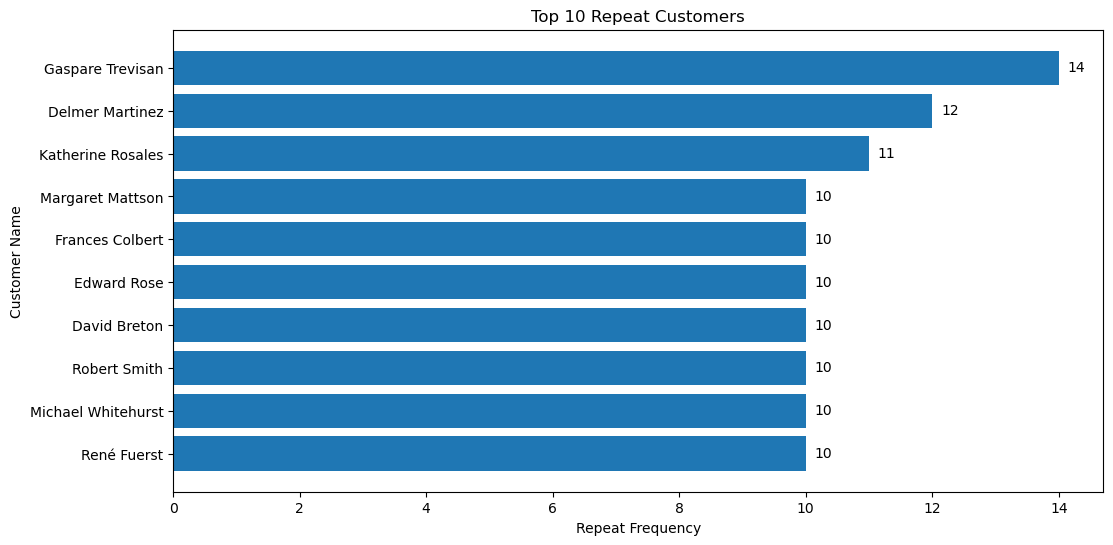

In [89]:
plt.figure(figsize=(12,6))
barh = plt.barh(Top10_Repeat_Customers['Customer Name'],Top10_Repeat_Customers['Purchase_Count'])
plt.title('Top 10 Repeat Customers')
plt.xlabel('Repeat Frequency')
plt.ylabel('Customer Name')

for bar in barh:
    width = bar.get_width()
    label = width
    plt.text(width + Top10_Repeat_Customers['Purchase_Count'].max() * 0.01, bar.get_y() + bar.get_height() / 2,label, va='center')
    
plt.show()

### 4. Customer Gender Distribution

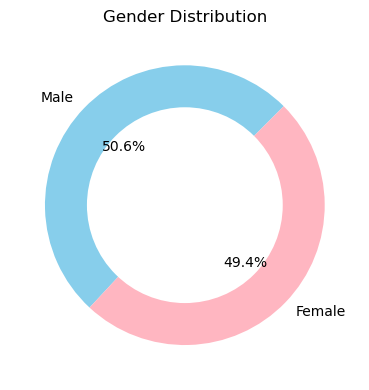

In [90]:
gender_counts = Full_Data['Gender'].value_counts()
# Plot
plt.figure(figsize=(4, 4))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=45, colors=['skyblue','lightpink'], wedgeprops={'width':0.4})

# Donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Title and display
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

### 5. Sales by Age Group and Gender

In [91]:
# Calculate age
today = pd.Timestamp.today()
Full_Data['Age'] = Full_Data['Birthday'].apply(lambda x: (today - x).days // 365)

bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
Full_Data['Age_Group'] = pd.cut(Full_Data['Age'], bins=bins, labels=labels)

Age_Gender_Sales = Full_Data.groupby(['Age_Group', 'Gender'])['Sales Amount USD'].mean().reset_index()

C:\Users\ravip\AppData\Local\Temp\ipykernel_36068\772814820.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



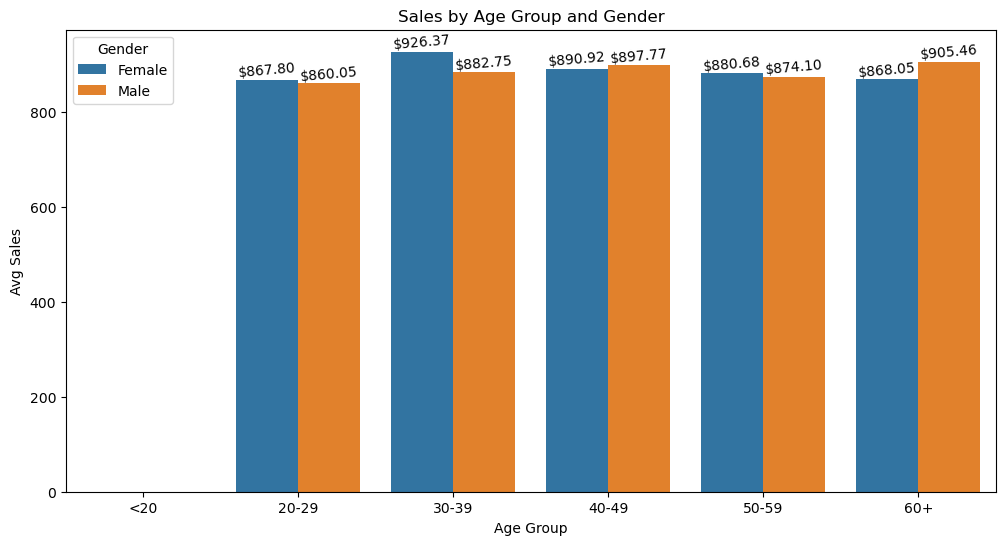

In [96]:
plt.figure(figsize=(12,6))
bars=sns.barplot(data=Age_Gender_Sales,x='Age_Group',y='Sales Amount USD',hue='Gender')
plt.title('Sales by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel("Avg Sales")
plt.xticks(rotation=0)
for bar in bars.patches:
    height = bar.get_height()
    label = f'${height:.2f}'
    if label != '$0.00':
        plt.text(bar.get_x() + bar.get_width() / 2,height,label,ha='center', va='bottom',rotation=5)
plt.show()